In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import scipy as sp
from sklearn.linear_model import LinearRegression

pd.set_option("display.max_columns", 100)

import statsmodels.api as sm
import statsmodels.stats.api as sms


In [4]:
df = pd.read_csv('Data/Ames_HousePrice.csv')

In [5]:
numeric = df.select_dtypes('number')
numeric.head(3)

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,909176150,856,126000,30,NaN,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010
1,2,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009
2,3,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007


In [6]:
Area = numeric[['LotArea','GrLivArea','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', '3SsnPorch', 'BsmtFinSF1', 
                'BsmtFinSF2', 'WoodDeckSF','BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
               'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'PoolArea',
               'ScreenPorch', 'TotalBsmtSF']]
Area.head(3)

,LotArea,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,WoodDeckSF,BsmtUnfSF,EnclosedPorch,GarageArea,LotFrontage,MasVnrArea,OpenPorchSF,PoolArea,ScreenPorch,TotalBsmtSF
0,7890,856,856,0,0,0,238.0,0.0,0,618.0,0,399.0,NaN,0.0,0,0,166,856.0
1,4235,1049,1049,0,0,0,552.0,393.0,0,104.0,0,266.0,42.0,149.0,105,0,0,1049.0
2,6060,1001,1001,0,0,86,737.0,0.0,154,100.0,42,216.0,60.0,0.0,0,0,0,837.0


In [7]:
#Impute with 896 for the one missing TotalBsmtSF which is size of 1stFlrSF:
Area['TotalBsmtSF'] = Area['TotalBsmtSF'].replace(np.nan, 896)

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_4153/1729680531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Area['TotalBsmtSF'] = Area['TotalBsmtSF'].replace(np.nan, 896)


In [8]:
Area['GarageArea'] = Area['GarageArea'].replace(np.nan, 0)

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_4153/2728991719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Area['GarageArea'] = Area['GarageArea'].replace(np.nan, 0)


In [9]:
Area['MasVnrArea'] = Area['MasVnrArea'].replace(np.nan, 0)

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_4153/289676058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Area['MasVnrArea'] = Area['MasVnrArea'].replace(np.nan, 0)


In [10]:
# Group lots by configuration
grouped_lots = df.groupby(['LotConfig']).agg({
   'LotFrontage' : 'mean', 
})

#grouped_lots

LC = df[['LotConfig']]
Area['LC'] = LC

#replace np.nan with average for lot_config of that type
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'Corner'), 'LotFrontage'] = 84.46
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'CulDSac'), 'LotFrontage'] = 56.45        
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'FR2'), 'LotFrontage'] = 59.41        
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'FR3'), 'LotFrontage'] = 79.3        
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'Inside'), 'LotFrontage'] = 66.63

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_4153/2369724597.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Area['LC'] = LC
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
GBGVWLO = Area[['GrLivArea', 'TotalBsmtSF', 'GarageArea','MasVnrArea', 'WoodDeckSF','LotFrontage','OpenPorchSF']]
GBGVWLO.shape

(2580, 7)

In [12]:
GBGVWLO = GBGVWLO.assign(GBGVWLO = GBGVWLO['GrLivArea'] + GBGVWLO['TotalBsmtSF'] + 
                     GBGVWLO['GarageArea'] + GBGVWLO['MasVnrArea'] + GBGVWLO['WoodDeckSF'] +
                      GBGVWLO['LotFrontage'] + GBGVWLO['OpenPorchSF'])
GBGVWLO.head(3)

,GrLivArea,TotalBsmtSF,GarageArea,MasVnrArea,WoodDeckSF,LotFrontage,OpenPorchSF,GBGVWLO
0,856,856.0,399.0,0.0,0,84.46,0,2195.46
1,1049,1049.0,266.0,149.0,0,42.00,105,2660.00
2,1001,837.0,216.0,0.0,154,60.00,0,2268.00


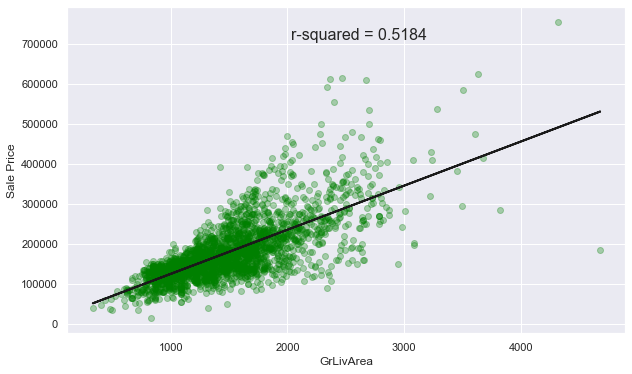

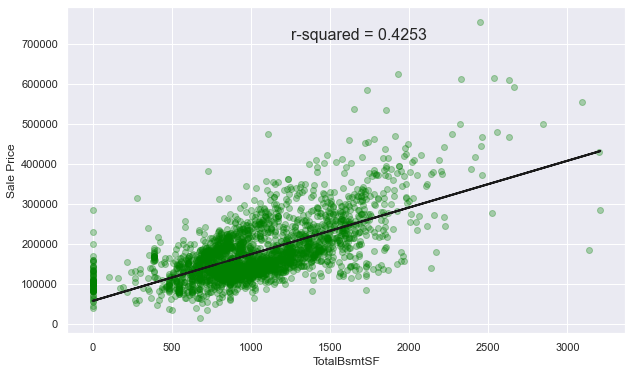

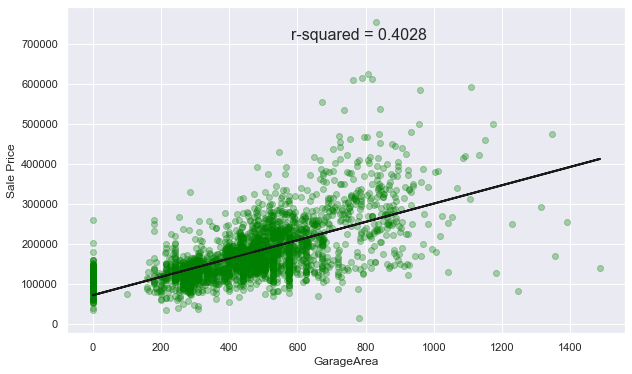

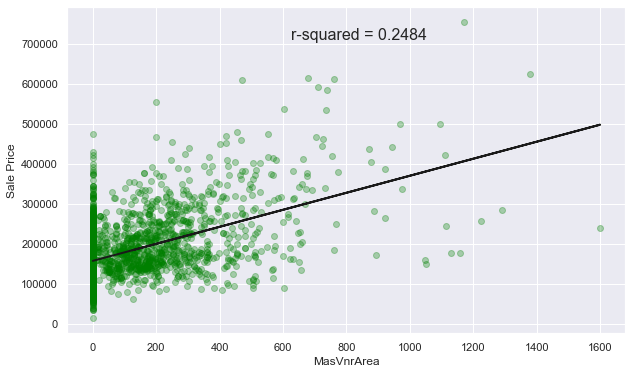

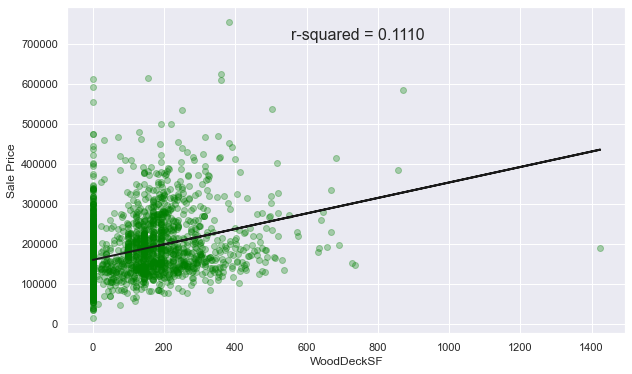

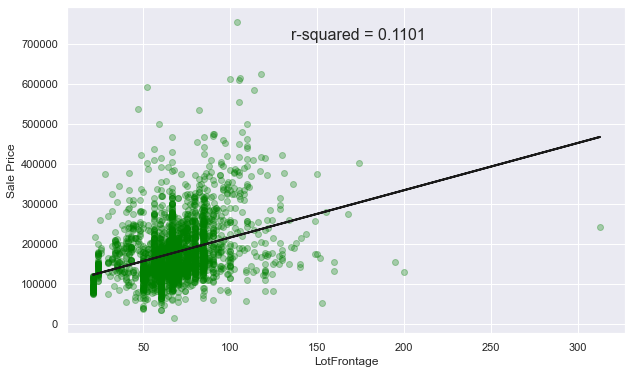

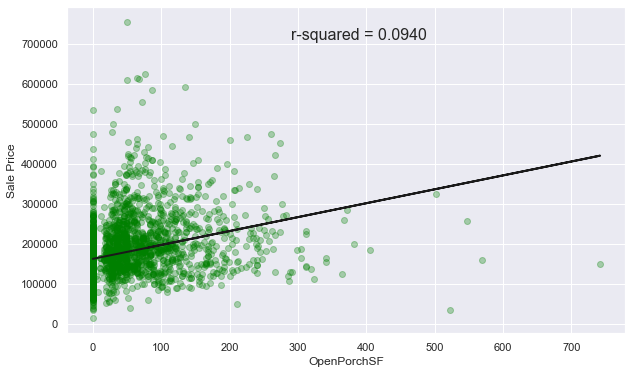

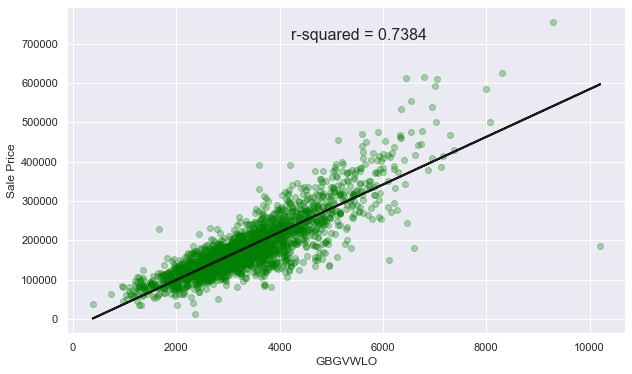

In [13]:
column_name = []
R2 = []

for column in GBGVWLO:

    regressor = LinearRegression()

    y = numeric['SalePrice'].values.reshape(-1,1)
    x = GBGVWLO[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [14]:
SLR = pd.DataFrame(R2, column_name, columns=['R-Squared']).rename_axis('Feature').reset_index()
SLR.sort_values(by=['R-Squared'], ascending=False)

,Feature,R-Squared
7,GBGVWLO,0.738392
0,GrLivArea,0.518373
1,TotalBsmtSF,0.425312
2,GarageArea,0.402804
3,MasVnrArea,0.248434
4,WoodDeckSF,0.111043
5,LotFrontage,0.110050
6,OpenPorchSF,0.093967


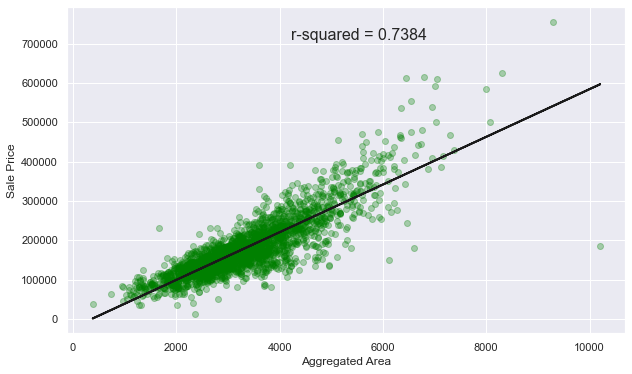

In [15]:
regressor = LinearRegression()

y = numeric['SalePrice'].values.reshape(-1,1)
x = GBGVWLO['GBGVWLO'].values.reshape(-1,1)
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

plt.scatter(x,y, c='green', alpha=0.3)
plt.xlabel('Aggregated Area')
plt.ylabel('Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
plt.show()

### Assumption Checks (No Transformation) ###

In [16]:
# Obtain and set x=input and y=output
x0 = GBGVWLO[["GBGVWLO"]]
y0 = numeric.SalePrice

In [17]:
#Setup statsmodels.api, inputs (x, x_constant, and y)
x_constant0 = sm.add_constant(x)

In [18]:
#Run OLS with statsmodels
lin_reg0 = sm.OLS(y,x_constant0).fit()
lin_reg0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     7276.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:27:09   Log-Likelihood:                -30893.
No. Observations:                2580   AIC:                         6.179e+04
Df Residuals:                    2578   BIC:                         6.180e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.183e+04   2462.134     -8.866      0.000   -2.67e+04    -1.7e+04
x1            60.5983      0.710     85.302      0.000      59.205      61.991
==============================================================================
Omnibus:                      438.545   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8646.779
Skew:                          -0.123   Prob(JB):                         0.00
Kurtosis:                      11.965   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

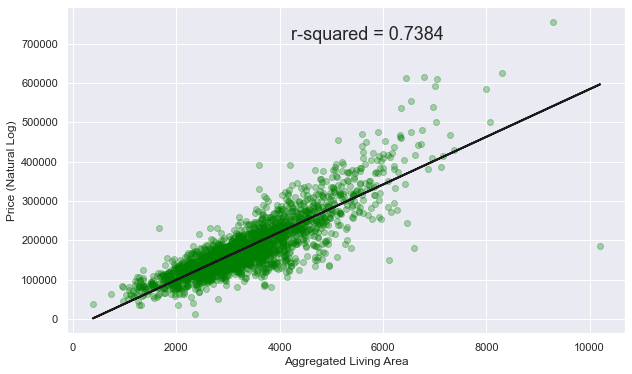

In [19]:
## Add fitted line to scatterplot
plt.plot(x0, lin_reg0.predict(), lw=2, c='k')

plt.scatter(x0, y0, c='green', alpha=0.3)
plt.xlabel('Aggregated Living Area')
plt.ylabel('Price (Natural Log)')
plt.annotate("r-squared = {:.4f}".format(lin_reg0.rsquared), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=18)
plt.show()

In [20]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

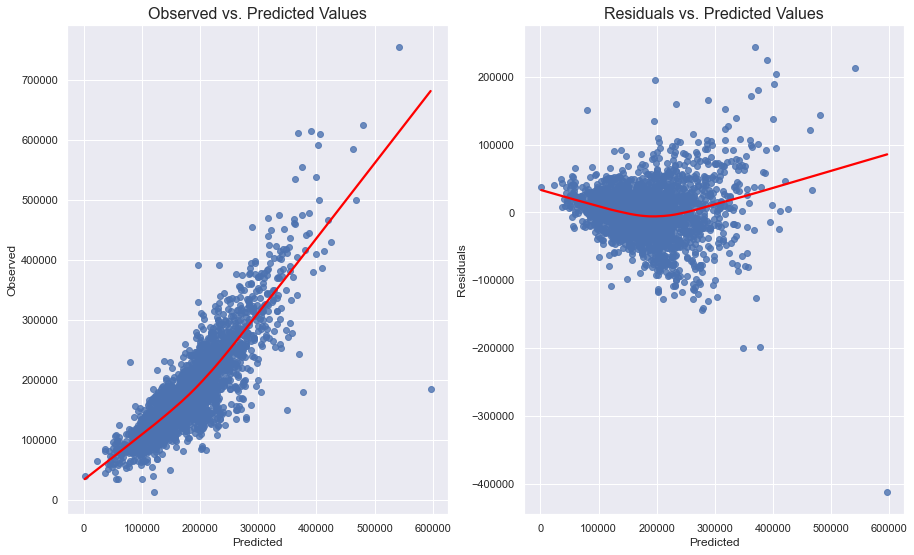

In [21]:
#Run Linearity Test for Assumption #1

import seaborn as sns 
import matplotlib.pyplot as plt

#import statsmodels.stats.api as sms

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

linearity_test(lin_reg0, y)

In [22]:
#Check Assumption 2: Is expected (mean) value of residuals = 0? 
lin_reg0.resid.mean()

1.6767416120499603e-10

In [23]:
#Check Assumption 3: Are errors independent? 
import statsmodels
statsmodels.stats.stattools.durbin_watson(lin_reg0.resid)

1.9418551011776788

In [24]:
#Check Assumption 4: Normality of Residuals
from scipy import stats
import statsmodels.api as sm

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    


Jarque-Bera test ---- statistic: 8646.7786, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9272, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5050, p-value: 0.0000
Anderson-Darling test ---- statistic: 32.0319, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


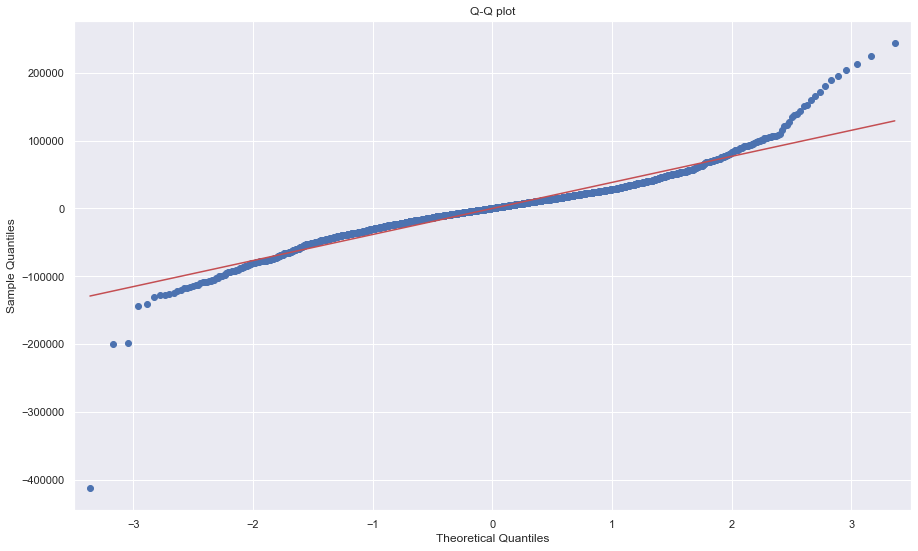

In [25]:
normality_of_residuals_test(lin_reg0)

### Train, Test ###

In [26]:
# Obtain and set x=input and y=output
x = GBGVWLO[["GBGVWLO"]]
y = numeric.SalePrice

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [27]:
ols = LinearRegression()
ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.728646
--------------------------------------------------
R^2 for test  set: 0.759765


In [28]:
ols.coef_

array([60.38051679])

In [29]:
ols.intercept_

-20740.065077922045

#### Price / Area for this model is the B1 term, 60.826 ####

## Log-Log Transformation & Assumption Checks ##

In [30]:
# Obtain and set x=input and y=output, take natural log of price 
x = np.log10(GBGVWLO[["GBGVWLO"]])
y = np.log10(numeric.SalePrice)

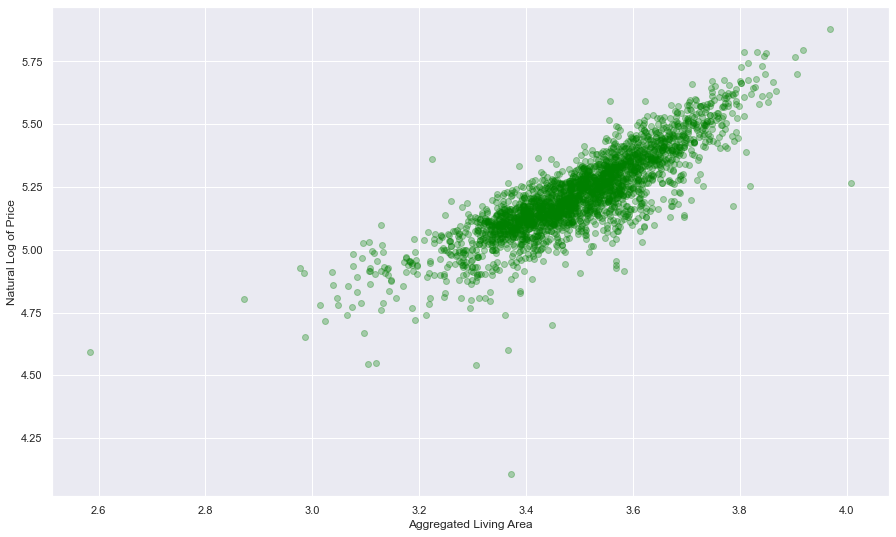

In [31]:
#Check Assumption 1: Linearity of relationship between input (x) and output (y) 
#using (A) scatterplot & (B) linearity tests

# Create (A) scatter plot between x and y
plt.scatter(x, y, c='green', alpha=0.3)
plt.xlabel('Aggregated Living Area')
plt.ylabel('Natural Log of Price')
plt.show()

In [32]:
#Setup statsmodels.api, inputs (x, x_constant, and y)
x_constant = sm.add_constant(x)

In [33]:
#Run OLS with statsmodels
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     6694.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:27:31   Log-Likelihood:                 2589.7
No. Observations:                2580   AIC:                            -5175.
Df Residuals:                    2578   BIC:                            -5164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6560      0.044     38.014      0.000       1.571       1.741
GBGVWLO        1.0186      0.012     81.819      0.000       0.994       1.043
==============================================================================
Omnibus:                      773.150   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7147.187
Skew:                          -1.146   Prob(JB):                         0.00
Kurtosis:                      10.825   Cond. No.                         94.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

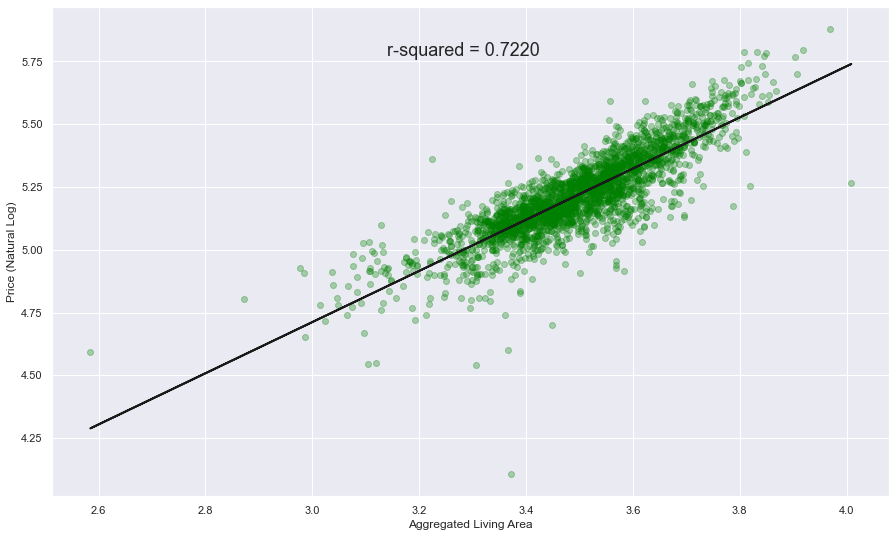

In [34]:
## Add fitted line to scatterplot
plt.plot(x, lin_reg.predict(), lw=2, c='k')

plt.scatter(x, y, c='green', alpha=0.3)
plt.xlabel('Aggregated Living Area')
plt.ylabel('Price (Natural Log)')
plt.annotate("r-squared = {:.4f}".format(lin_reg.rsquared), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=18)
plt.show()

In [35]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

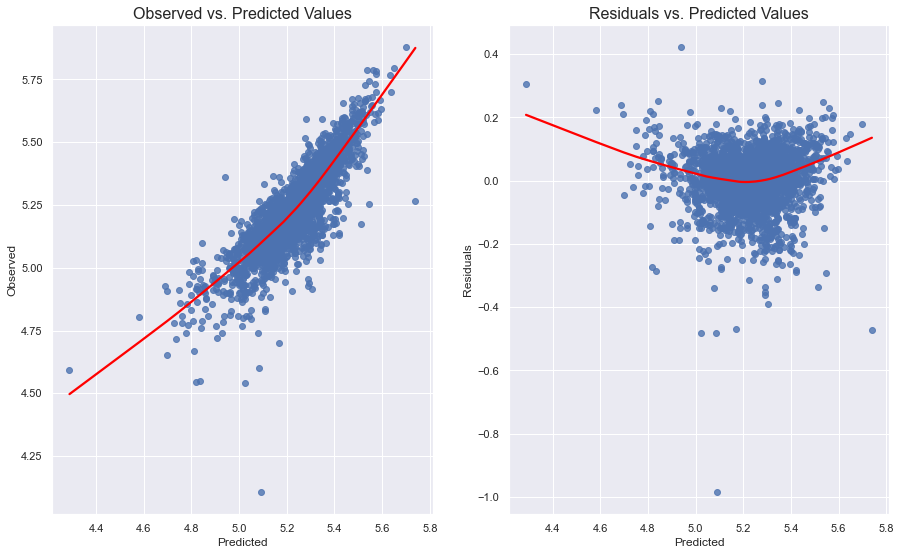

In [36]:
#Run (B) Linearity Test for Assumption #1

import seaborn as sns 
import matplotlib.pyplot as plt

#import statsmodels.stats.api as sms

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

linearity_test(lin_reg, y)

In [37]:
#Check Assumption 2: Is expected (mean) value of residuals = 0? 
lin_reg.resid.mean()

-5.271924154762681e-15

In [38]:
#Check Assumption 3: Are errors independent? 
import statsmodels
statsmodels.stats.stattools.durbin_watson(lin_reg.resid)

1.9481900421092841

In [39]:
#Check Assumption 4: Normality of Residuals
from scipy import stats
import statsmodels.api as sm

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    


Jarque-Bera test ---- statistic: 7147.1870, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9463, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.4177, p-value: 0.0000
Anderson-Darling test ---- statistic: 19.0448, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


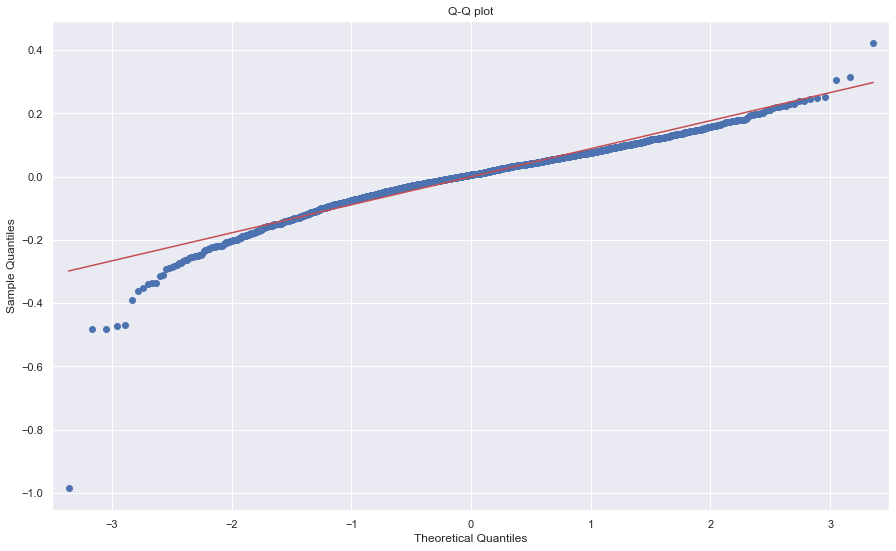

In [40]:
normality_of_residuals_test(lin_reg)

### Train, Test ###

In [41]:
# Obtain and set x=input and y=output, take log base 10 of both input/output
x = np.log10(GBGVWLO[["GBGVWLO"]])
y = np.log10(numeric.SalePrice)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [42]:
ols = LinearRegression()
ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.731474
--------------------------------------------------
R^2 for test  set: 0.693447


In [43]:
ols.coef_

array([1.00692275])

In [44]:
ols.intercept_

1.697653815002147

#### Price / Area for this model, assume 4000 as area ####

In [45]:
((10**ols.intercept_)*(4000**ols.coef_))/4000

array([52.79465719])

In [46]:
(10**ols.intercept_)*(4000**(ols.coef_-1)) 

array([52.79465719])